In [2]:
import pandas as pd

In [3]:
covid_19 = pd.read_csv('C:\\Users\\User\\Desktop\\Basic Programming by Aj.Ton\Python_dataviz\\2019_nCoV_data.csv')

In [4]:
covid_19

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26,0,0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2,0,0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1,0,0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4,0,0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1,0,0


In [5]:
covid_19.isnull().any() #เช็คค่า missing พบว่ามีค่า missing ใน Province/State

Sno               False
Date              False
Province/State     True
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [6]:
covid_19['Province/State']=covid_19['Province/State'].fillna('Other') #แก้ค่า missing โดยแทนค่า Other

In [7]:
covid_19

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1,0,0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14,0,0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6,0,0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1,0,0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0,0,0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26,0,0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2,0,0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1,0,0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4,0,0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1,0,0


In [8]:
covid_Aus = covid_19[covid_19['Country']!='Australia']
covid_Main = covid_Aus[covid_Aus['Country']!='Mainland China']
covid_Ca = covid_Main [covid_Main['Country']!='Canada']
covid_Me = covid_Ca[covid_Ca['Country']!='Mexico']
covid_Ot = covid_Me[covid_Me['Country']!='Others']  #ให้ไปเก็บค่าของข้อมูลในตารางใหม่

In [9]:
New = set(covid_Ot['Country']) #set8ค่า ของ covid_Ot ใน Country

In [10]:
Confirmed = [] #เก็บค่า Confirmed,Deaths,Recovered,Country_new ไว้ใน listว่าง []
Deaths = []
Recovered = []
Country_new = [] 
for i in New:              #ทำการวนลูปค่า ในตาราง New
    Con = 0                #ทำการวนลูปค่า Confirmed,Deaths,Recovered,Country_new
    Dea = 0               
    Rec = 0
    for j in range(len(covid_19)):
        if i == covid_19['Country'][j]:
            Con+=covid_19['Confirmed'][j]
            Dea+=covid_19['Deaths'][j]
            Rec+=covid_19['Recovered'][j]
    Country_new.append(i)  
    Confirmed.append(Con) 
    Deaths.append(Dea) 
    Recovered.append(Rec) 

In [11]:
covid_19.isnull().any() #เช็คค่า missing อีกครั้ง พบว่า ไม่มีค่า missing แล้ว

Sno               False
Date              False
Province/State    False
Country           False
Last Update       False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [12]:
New_1 =  {'Country': Country_new,'Confirmed':Confirmed,'Deaths':Deaths,'Recovered' :Recovered} 

In [13]:
df_covid = pd.DataFrame.from_dict(New_1)

In [14]:
df_covid

,Country,Confirmed,Deaths,Recovered
0,Russia,36,0,12
1,Brazil,0,0,0
2,Malaysia,303,0,37
3,Cambodia,22,0,6
4,Italy,49,0,0
5,Germany,252,0,5
6,Sweden,18,0,0
7,Taiwan,320,2,16
8,Sri Lanka,22,0,10
9,India,50,0,6


In [15]:
df_covid.drop(df_covid[df_covid['Country'] == 'Mainland China' ].index, inplace = True) #drop Mainland China ใน Country

In [16]:
df_covid

,Country,Confirmed,Deaths,Recovered
0,Russia,36,0,12
1,Brazil,0,0,0
2,Malaysia,303,0,37
3,Cambodia,22,0,6
4,Italy,49,0,0
5,Germany,252,0,5
6,Sweden,18,0,0
7,Taiwan,320,2,16
8,Sri Lanka,22,0,10
9,India,50,0,6


# พอตกราฟ

In [17]:
import matplotlib.pyplot as plt
import numpy as np

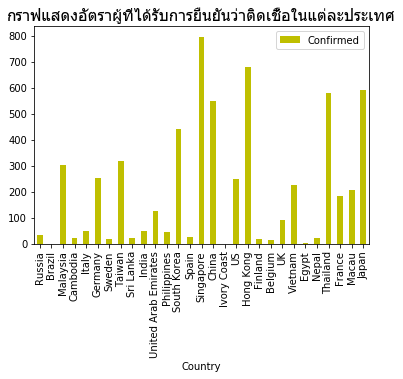

In [30]:
# กราฟแสดงอัตราผู้ที่ได้รับการยืนยันว่าติดเชื้อในแต่ละประเทศ
df_covid.plot(kind='bar' ,x='Country',y='Confirmed', color='y') 
plt.title(u'กราฟแสดงอัตราผู้ที่ได้รับการยืนยันว่าติดเชื้อในแต่ละประเทศ',fontname='Tahoma',fontsize='16') 
plt.show()

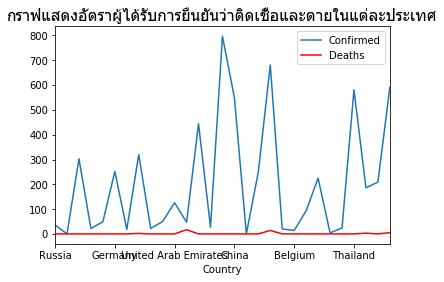

In [32]:
# กราฟแสดงอัตราผู้ได้รับการยืนยันว่าติดเชื้อและตายในแต่ละประเทศ
ax = plt.gca() 
df_covid.plot(kind='line',x='Country',y='Confirmed',ax=ax) 
df_covid.plot(kind='line',x='Country',y='Deaths', color='r', ax=ax) 
plt.title(u'กราฟแสดงอัตราผู้ได้รับการยืนยันว่าติดเชื้อและตายในแต่ละประเทศ',fontname='Tahoma',fontsize='16')
plt.show() 

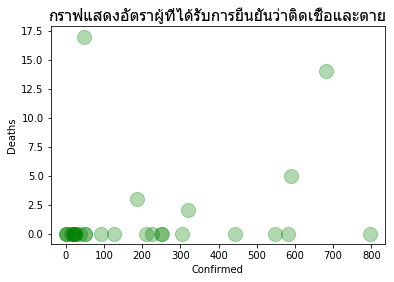

In [33]:
# กราฟแสดงอัตราผู้ที่ได้รับการยืนยันว่าติดเชื้อและตาย
import matplotlib.pyplot as plt 
df_covid.plot(kind='scatter', x='Confirmed', y='Deaths', color='g',s=200,alpha=0.3)
plt.title(u'กราฟแสดงอัตราผู้ที่ได้รับการยืนยันว่าติดเชื้อและตาย',fontname='Tahoma',fontsize='16')
plt.show() 